# Ejemplos de uso

## 1. Archivos Separados por Comas (csv)

In [ ]:
import csv
import random

import numpy as np

from pathlib import Path

path = Path('my_csv.csv')

data = [
    ['Fecha', 'Prec', 'Caudal', 'Nivel'],
    ['2025-07-01', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-02', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-03', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-04', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-05', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-06', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-07', random.randint(0, 120), random.random(), random.random()],
    ['2025-07-08', random.randint(0, 120), random.random(), random.random()],
]

with open(path, 'w', newline='\n') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(data)

with open(path, 'r', newline='\n') as csvfile:
    csvreader = csv.reader(csvfile)
    data_read = [_ for _ in csvreader]

for row in data_read:
    print(row)

In [ ]:
# Podríamos preguntarle a la IA: ¿...? (Usar Pandas para leer csv)





## 2. Planillas de cálculo de Excel (xlsx)

In [ ]:
import datetime

import numpy as np
import pandas as pd

from pathlib import Path

path = Path('Libro Excel.xlsx')

data_dict_1 = {
    'Prec': np.random.randint(0, 200, 10),
    'Q': np.random.rand(10)*10,
    'Nivel': np.random.rand(10),
    'Temp': np.random.rand(10)*30,
    'Viento': np.random.rand(10)*10,
}
data_dict_2 = {
    'Prec': np.random.randint(0, 200, 10),
    'Q': np.random.rand(10)*10,
    'Nivel': np.random.rand(10),
    'Temp': np.random.rand(10)*30,
    'Viento': np.random.rand(10)*10,
}
data_index = np.arange(
    datetime.datetime(2025, 8, 1),
    datetime.datetime(2025, 8, 11),
    datetime.timedelta(days=1),
)

df1 = pd.DataFrame(data=data_dict_1, index=data_index)
df2 = pd.DataFrame(data=data_dict_2, index=data_index)
with pd.ExcelWriter(path) as writer:
    df1.to_excel(writer, 'Estacion 1')
    df2.to_excel(writer, 'Estacion 2')

In [ ]:
# Podríamos preguntarle a la IA: ¿...? (Usar Pandas para leer Excel)





## 3. Archivos json

In [ ]:
import json

data = {
    "nombre": "Estudiantes",
    "cursos": [
        {"id": 1, "nombre": "Ana", "nota": 85},
        {"id": 2, "nombre": "Juan", "nota": 90},
        {"id": 3, "nombre": "María", "nota": 78}
    ]
}

with open('estudiantes.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

In [ ]:
import json

with open('estudiantes.json', 'r', encoding='utf-8') as file:
    data_read = json.load(file)
data_read

In [ ]:
import json

import geopandas as gpd
import pandas as pd

data = {
    'nombre': ['Punto A', 'Punto B', 'Punto C'],
    'latitud': [-34.61, -34.65, -34.60],
    'longitud': [-58.38, -58.40, -58.42],
    'valor': [100, 200, 300],
}
df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitud, df.latitud),
    crs="EPSG:4326",
)
geojson_dict = gdf.__geo_interface__
with open('puntos.geojson', 'w', encoding='utf-8') as file:
    json.dump(geojson_dict, file, indent=4, ensure_ascii=False)

gdf_read = gpd.read_file('puntos.geojson')
gdf_read

In [ ]:
import folium

mapa = folium.Map(location=[-34.61, -58.38], zoom_start=12)
folium.GeoJson('puntos.geojson').add_to(mapa)
mapa.save('mapa.html')

## 4. Archivos shp

In [ ]:
import shapefile

w = shapefile.Writer('points_example', shapeType=shapefile.POINT)

w.field('ID', 'N')
w.field('Name', 'C', 50)

w.point(-122.5, 37.8)
w.record(1, 'San Francisco')
w.point(-118.3, 34.0)
w.record(2, 'Los Angeles')
w.point(-117.2, 32.7)
w.record(3, 'San Diego')

w.close()

r = shapefile.Reader('points_example')

for shape, record in zip(r.shapes(), r.records()):
    x, y = shape.points[0]
    print(f"Point: ID={record[0]}, Name={record[1]}, Coordinates=({x}, {y})")
    
r.close()

## 5. Archivos ráster (tif)

In [ ]:
import rasterio

import numpy as np

from rasterio.transform import from_origin

width, height = 100, 100
pixel_size = 30.0
west, north = -64.2, -31.3

data = np.random.rand(height, width) * 1000

crs = 'EPSG:4326'
transform = from_origin(west, north, pixel_size / 3600, pixel_size / 3600)

with rasterio.open(
    'sample_raster.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=data.dtype,
    crs=crs,
    transform=transform
) as dst:
    dst.write(data, 1)

with rasterio.open('sample_raster.tif') as src:
    raster_data = src.read(1)
    profile = src.profile

raster_data, profile

## 6. Documentos pdf

In [ ]:
import rasterio

import pandas as pd
import numpy as np

from PIL import Image
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as ReportLabImage, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

with rasterio.open('sample_raster.tif') as src:
    img_data = src.read(1)
img = Image.fromarray((img_data / img_data.max() * 255).astype(np.uint8))
img_path = 'sample_raster.png'
img.save(img_path)

pdf_path = 'raster_report.pdf'
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
elements = []

styles = getSampleStyleSheet()
title_style = styles['Heading1']
normal_style = styles['Normal']

elements.append(Paragraph("Reporte de Ejemplo", title_style))
elements.append(Spacer(1, 12))

elements.append(Paragraph(
    "Este reporte presenta un ejemplo de cómo se podría presentar un informe sobre alguna actividad, presentando una imágen y una tabla.",
    normal_style
))
elements.append(Spacer(1, 12))

elements.append(Paragraph("Raster Visualization", styles['Heading2']))
elements.append(ReportLabImage(img_path, width=300, height=300))
elements.append(Paragraph("Figura 1. Información en forma de raster (100x100 grid).", normal_style))
elements.append(Spacer(1, 12))

elements.append(Paragraph("Data Summary", styles['Heading2']))
table_data = [df.columns.tolist()] + df.values.tolist()
table = Table(table_data)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 12),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
]))
elements.append(table)
elements.append(Spacer(1, 12))

elements.append(Paragraph(
    "This report demonstrates the integration of raster and tabular data for analysis. "
    "The GeoTIFF was generated using rasterio, and the CSV was processed to produce this table.",
    normal_style
))

doc.build(elements)

## 7. Regresión lineal

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.regression.linear_model import OLS

x = np.random.rand(100)
y = x + np.random.rand(100) * 0.2

conf = 0.05
X = sm.add_constant(x)
exog = X
endog = y
model = OLS(endog, exog)
fitted = model.fit()
interp = fitted.get_prediction([[1, 0], [1, 1]])
confint = interp.conf_int(conf).T

fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=800)
ax.plot(x, y, marker='x', lw=0, color='red', label='Relacion X-Y')
ax.plot([0, 1], interp.predicted_mean, ls='-', lw=1.5, color='black', label='Ajuste lineal X-Y')
ax.plot([0, 1], confint[0], ls='--', lw=1, color='black', label=f'Confianza para el {100*(1-conf):.0f} %')
ax.plot([0, 1], confint[1], ls='--', lw=1, color='black')
ax.text(
    x=0.94, y=0.06, ha='right', va='bottom', fontstyle='italic',
    s=f'$R^2=${fitted.rsquared:.2f}\n$Pendiente=${fitted.params[-1]:.2f}\nOrigen={fitted.params[0]:.2f}',
    transform=ax.transAxes,
)
ax.grid(alpha=0.4)
ax.set_xlabel('Variable X')
ax.set_ylabel('Variable Y')
ax.legend(loc='upper left')
plt.show()

## 8. Correlación entre dos variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

df = pd.DataFrame(
    data={
        'var1': np.array([0, 0, 0, 0, 0, 0, 0, 2, 5, 10, 40, 30, 20, 12, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        'var2': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 10, 40, 30, 20, 12, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0]) * 0.3 / 10 - 300,
    },
)

max_lag = 15
lags = np.arange(max_lag)
correlations = [np.corrcoef(df['var1'], df['var2'])[0, 1]]
correlations = np.concatenate([correlations, [np.corrcoef(df['var1'][:-lag], df['var2'][lag:])[0, 1] for lag in lags[1:]]])
df_corr = pd.DataFrame(
    data={'lags': lags, 'corrs': correlations},
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df.index, y=df['var1'], name='var1', line=dict(color='blue', width=2), marker=dict(size=8)),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['var2'], name='var2', line=dict(color='red', width=2), marker=dict(size=8)),
    secondary_y=True,
)
fig.update_layout(
    xaxis=dict(title='Tiempo (t)', showgrid=True),
    yaxis=dict(title='Var 1 (mm)', tickfont=dict(color='blue')),
    yaxis2=dict(title='Var 2 (cm)', tickfont=dict(color='red'), overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
    showlegend=True,
)
fig.show()

fig = px.line(
    df_corr, x='lags', y='corrs', markers=True,
)
fig.update_traces(line=dict(color='blue', width=2), marker=dict(size=8))
fig.update_layout(showlegend=True, xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))
fig.show()

## 9 Google Earth Engine

In [1]:
import ee # type: ignore

ee.Authenticate(force=False)
ee.Initialize(project='relampago-432015')

In [2]:
import datetime
import pyproj
import shapefile
import calendar
import rasterio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from rasterio.transform import from_bounds

def reprojection(
        x, y, projparams = None,
        crs_from: pyproj.CRS = pyproj.CRS.from_epsg("4326"),
        crs_to = None,
):
    """
    
    """
    if projparams is not None:
        crs_to = pyproj.Proj(
            f'+proj=sinu +R={projparams[0]} +nadgrids=@null +wktext'
        ).crs
    transformer = pyproj.Transformer.from_crs(
        crs_from, crs_to, always_xy=True,
    )
    return transformer.transform(x, y)

def get_shp_polygon(shp_path: Path):
    """
    
    """
    output = []
    with open(
        Path(shp_path.parent, shp_path.stem + '.prj'), "r"
    ) as prj:
        crs = pyproj.CRS.from_wkt(prj.read())
    with shapefile.Reader(shp_path) as shp_file:
        for record in shp_file.shapeRecords():
            points = np.array(record.shape.points)
            points = np.array(
                reprojection(
                    *points.T,
                    crs_from=crs,
                    crs_to=pyproj.CRS.from_epsg("4326"),
                )
            ).T
            output.append(ee.Geometry.Polygon(points.tolist()))
    return output

def get_region_from_shp(ic, shp_path: Path):
    """
    
    """
    first_image = ee.Image(ic.first())
    scale = first_image.projection().nominalScale().getInfo()
    geom = get_shp_polygon(shp_path)[0]
    return ic.getRegion(geom, scale)

def reshape_in_grid(data_dict):
    output = {
        'dt': np.unique(data_dict['dt']),
        'lat': np.unique(data_dict['lat']),
        'lon': np.unique(data_dict['lon']),
    }
    dt_idx = np.searchsorted(output['dt'], data_dict['dt'])
    lat_idx = np.searchsorted(output['lat'], data_dict['lat'])
    lon_idx = np.searchsorted(output['lon'], data_dict['lon'])
    for key in data_dict.keys():
        if key not in output.keys():
            output[key] = np.full(
                (len(output['dt']), len(output['lat']), len(output['lon'])),
                np.nan,
            )
            output[key][dt_idx, lat_idx, lon_idx] = data_dict[key]
    return output

def get_imerg(
        dt_0: str, dt_1: str, lon = None, lat = None, shp_path = None,
):
    """
    
    """
    col = 'NASA/GPM_L3/IMERG_MONTHLY_V07'
    ds = ['precipitation']
    ic = (
        ee.ImageCollection(col)
            .select(ds)
            .filterDate(dt_0, dt_1)
    )
    if shp_path is not None:
        region = get_region_from_shp(ic, shp_path)
    else:
        geom = ee.Geometry.Point(lon, lat)
        region = ic.getRegion(geom, 1)
    values = np.array(region.getInfo())
    output = {
        ds_: values[1:, values[0] == ds_].flatten().astype(float)
        for ds_ in ds
    }
    output['lon'] = values[1:, values[0] == 'longitude'].flatten().astype(float)
    output['lat'] = values[1:, values[0] == 'latitude'].flatten().astype(float)
    output['dt'] = np.array(
        [
            datetime.datetime.fromtimestamp(
                int(s) / 1000,
            ) + datetime.timedelta(hours=3)
            for s in values[1:, values[0] == 'time'].flatten()
        ]
    )
    for ds_ in ds:
        for t in range(output['dt'].shape[0]):
            output[ds_][t] = output[ds_][t]
    return output

def modis_qc_filter(image):
    """
    
    """
    et = image.select('ET')
    qc = image.select('ET_QC')
    mask = qc.eq(0)
    scale_factor = 0.1 / 8
    et_filtered = et.updateMask(mask).multiply(scale_factor)
    return image.addBands(et_filtered.rename('ET_filtered'))

def get_ee_imgs(col, ds, dt_0, dt_1, geom):
    output = None
    ic = (
        ee.ImageCollection(col)
            .select(ds)
            .filterDate(dt_0, dt_1)
            .map(modis_qc_filter)
            .select('ET_filtered')
    )
    count = ic.size().getInfo()
    if count > 0:
        scale = ee.Image(ic.first()).projection().nominalScale().getInfo()
        img = ic.mean()
        ic = ee.ImageCollection([img])
        region = ic.getRegion(geom, scale)
        values = region.getInfo()
        output = pd.DataFrame(values[1:], columns=values[0])
        output.loc[:, 'time'] = dt_0
        return output
    else:
        return pd.DataFrame()

def get_modis(
        dt_0: str, dt_1: str, shp_path = None,
):
    """
    
    """
    col = 'MODIS/061/MOD16A2GF'
    qc_ds = 'ET_QC'
    ds = ['ET', qc_ds]
    geoms = get_shp_polygon(shp_path)
    dt = pd.date_range(start=dt_0, end=dt_1, freq='MS').to_pydatetime()
    dt_0_ = dt[:-1]
    dt_1_ = (dt - datetime.timedelta(days=1))[1:]
    data = pd.concat(
        [
            get_ee_imgs(col, ds, _, __, geom)
            for geom in geoms
            for _, __ in zip(dt_0_, dt_1_)
        ], axis=0,
    )
    data = {c: data.loc[:, c].values for c in data.columns}
    data['lon'] = data.pop('longitude')
    data['lat'] = data.pop('latitude')
    data['dt'] = data.pop('time')
    output = reshape_in_grid(data)
    return output

def export_to_geotiff(path: Path, data, x_coords, y_coords, crs="EPSG:4326"):
    """
    
    """
    transform = from_bounds(
        x_coords[0], y_coords[0], x_coords[-1], y_coords[-1],
        x_coords.shape[0], y_coords.shape[0],
    )
    with rasterio.open(
        path,
        "w",
        driver="GTiff",
        height=data.shape[0],
        width=data.shape[1],
        count=1,
        dtype=data.dtype,
        crs=crs,
        transform=transform,
    ) as dst:
        dst.write(np.flip(data, axis=0), 1)

In [3]:
dt_0 = datetime.datetime(2024, 10, 1)
dt_1 = datetime.datetime(2025, 4, 1)
shp_path = Path('cordoba_pol', 'cordoba_pol.shp')
imerg = reshape_in_grid(get_imerg(dt_0, dt_1, shp_path=shp_path))

C:\Users\joako\AppData\Local\Temp\ipykernel_18476\2059875306.py:3: RuntimeWarning: Mean of empty slice
  img = ax.pcolormesh(imerg['lon'], imerg['lat'], np.nanmean(24 * imerg[ds], axis=0))


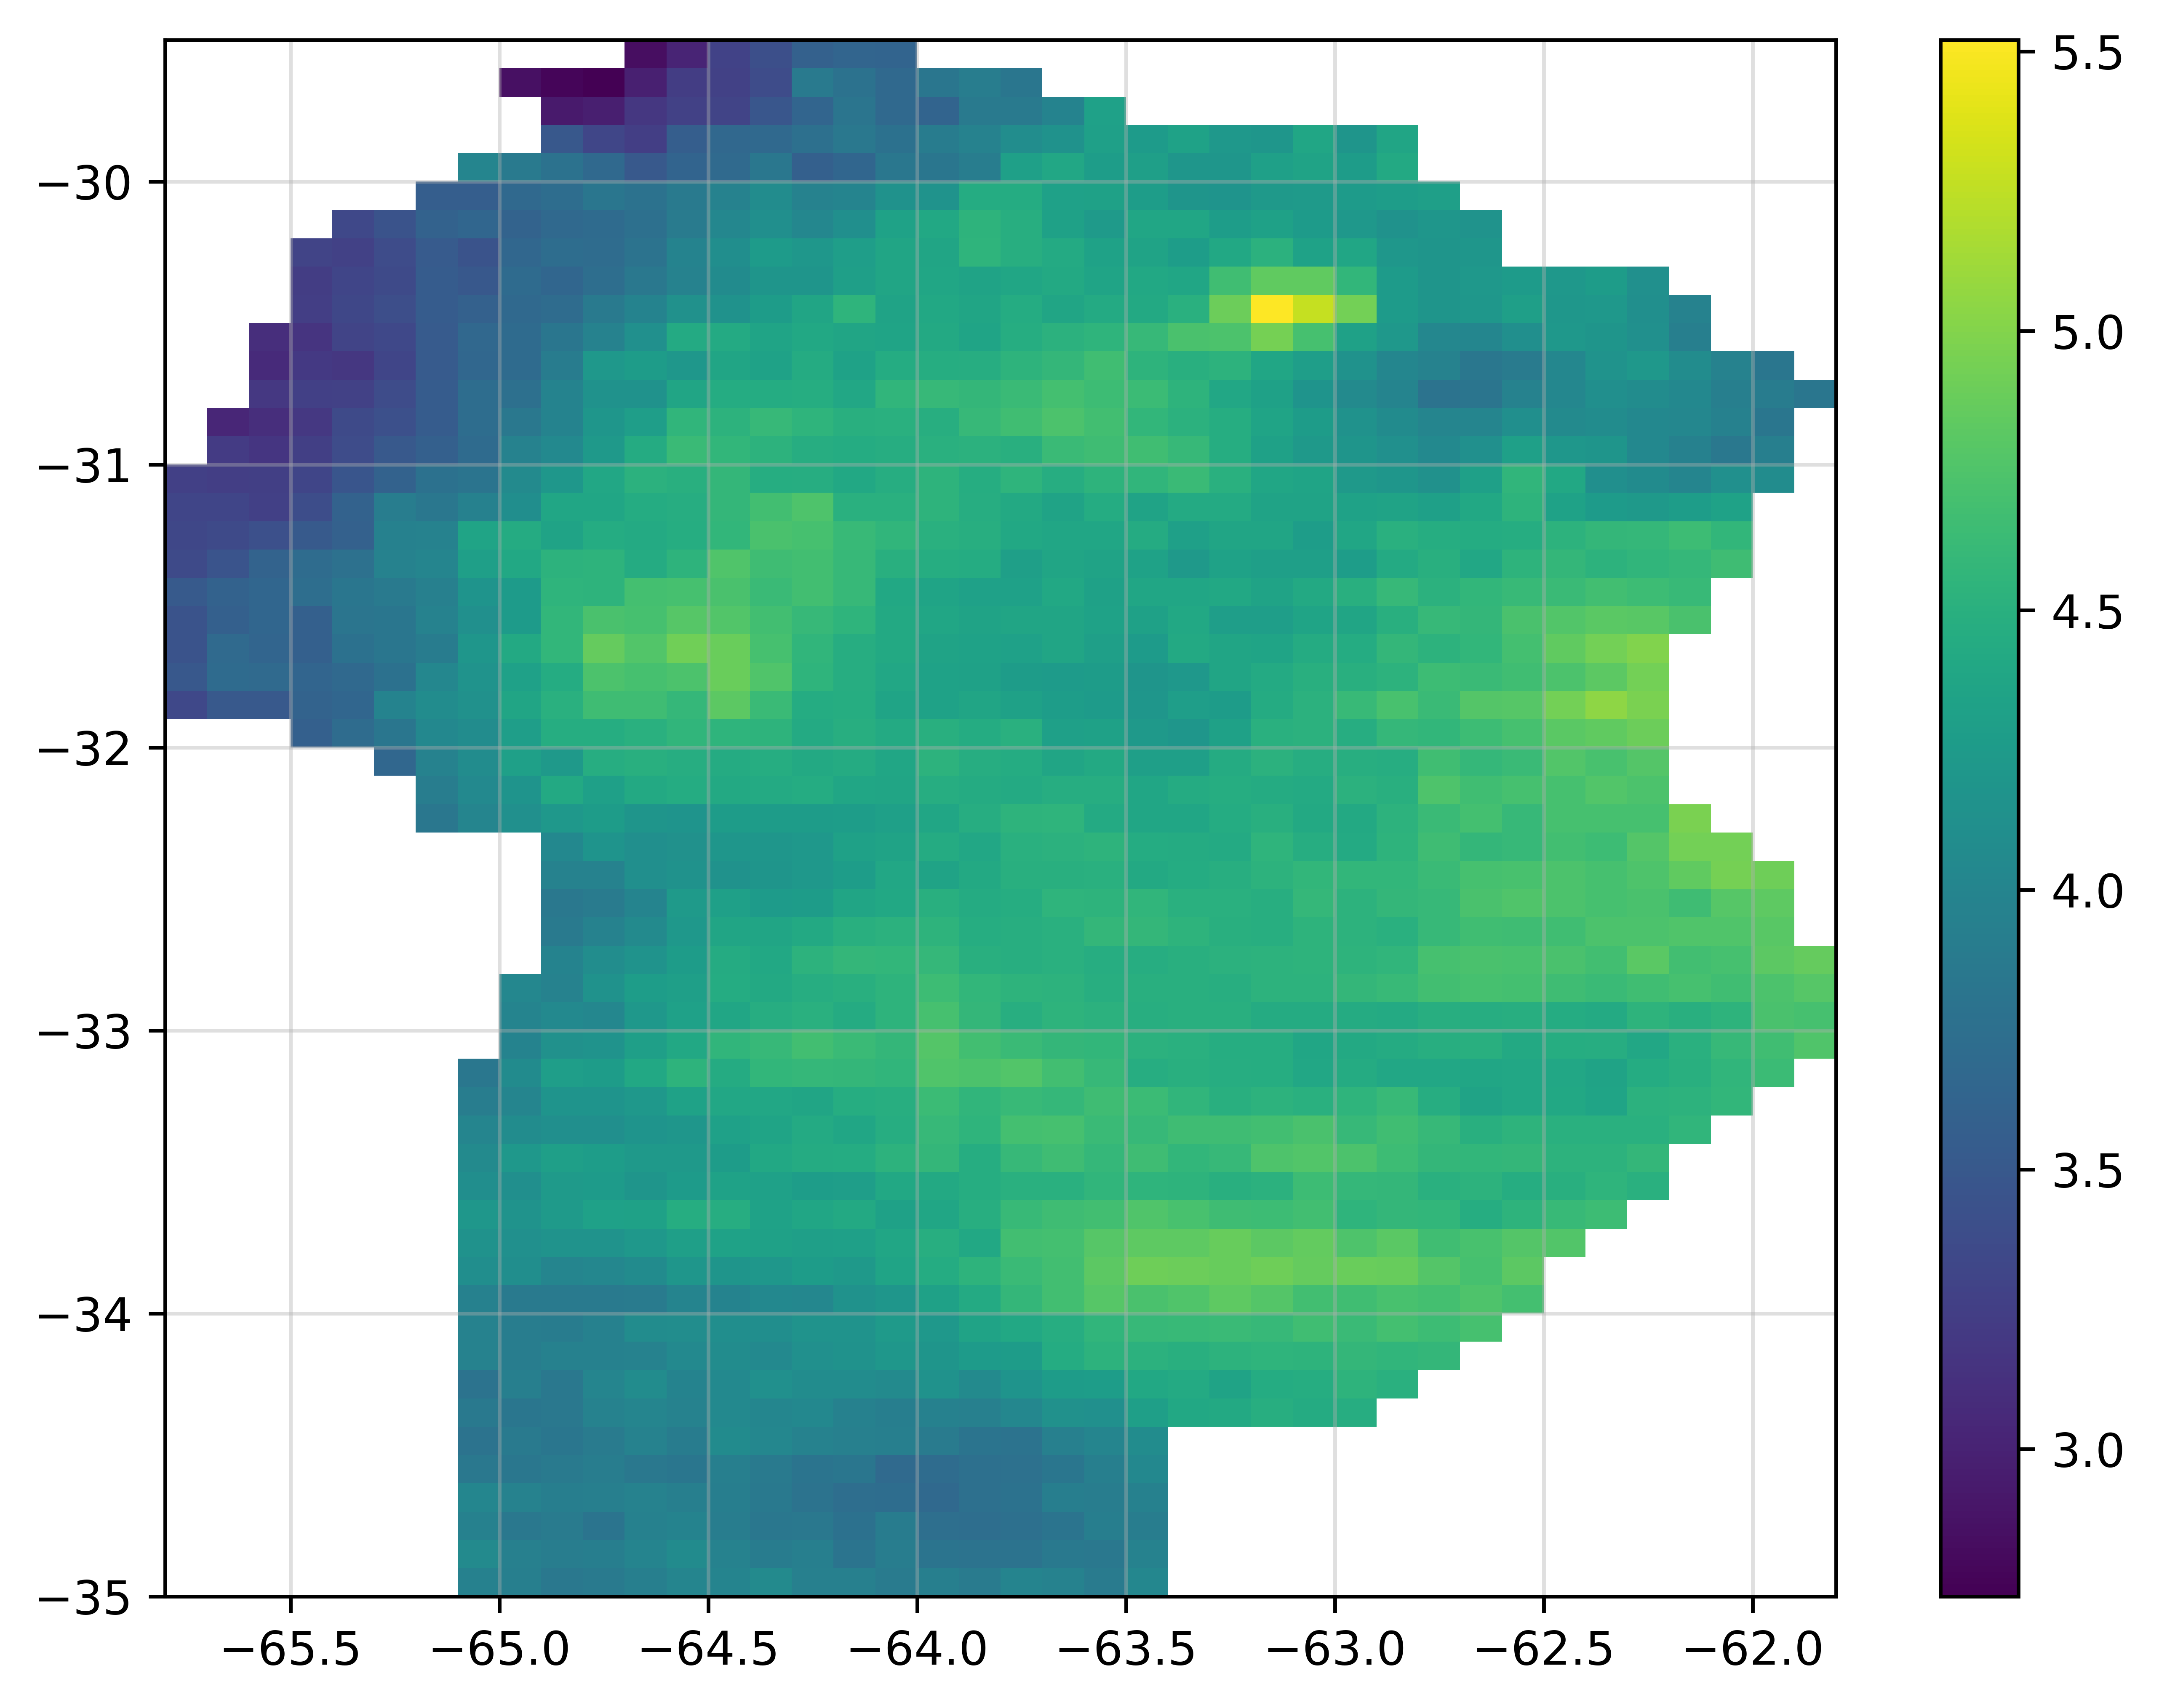

In [9]:
ds = 'precipitation'
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=800)
img = ax.pcolormesh(imerg['lon'], imerg['lat'], np.nanmean(24 * imerg[ds], axis=0))
ax.grid(alpha=0.4)
plt.colorbar(img)
plt.show()